# Web scraping using Selenium

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [169]:
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [104]:
driver = webdriver.Edge()
driver.get("https://op.gg/champions")

In [105]:
from selenium.webdriver.common.keys import Keys # for scrolled data
# Scroll down the page
driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
# Wait for content to load

import time
time.sleep(2) # Adjust the sleep time based on the website's loading speed
# Scrape the newly loaded content
new_content = driver.find_elements(By.TAG_NAME, 'tr')

In [115]:
rank = []
champion = []
winrate = []
pickrate = []
banrate = []

for item in new_content:
    tds = item.find_elements(By.TAG_NAME, 'td')
    if len(tds) < 7:
        continue

    rank.append(tds[0].text)
    champ_name = tds[1].find_element(By.XPATH, './/a//strong').text
    champion.append(champ_name)
    winrate.append(tds[4].text)
    pickrate.append(tds[5].text)
    banrate.append(tds[6].text)


In [253]:
df = pd.DataFrame({'Rank': rank, 'Champion': champion, 'Win Rate': winrate, 'Pick Rate': pickrate, 'Ban Rate': banrate})

In [223]:
df.tail()

,Rank,Champion,Win Rate,Pick Rate,Ban Rate
240,241,Corki,43.22%,0.86%,0.73%
241,242,Maokai,43.21%,0.59%,0.16%
242,243,Kalista,42.45%,2%,0.74%
243,244,Kayle,41.42%,2.27%,1.96%
244,245,Darius,40.54%,1.08%,12.93%


In [260]:
highestWinrate = df.sort_values(by = ['Win Rate'], ascending = True)

In [261]:
highestPickrate = df.sort_values(by = ['Pick Rate'], ascending = True)

In [262]:
highestBanrate = df.sort_values(by = ['Ban Rate'], ascending = True)

In [188]:
highestWinrate

,Rank,Champion,Win Rate,Pick Rate,Ban Rate
19,20,Renekton,52.95%,6.1%,4.28%
18,19,Irelia,53.25%,4.85%,18.51%
17,18,Gnar,53.33%,3.85%,1.65%
16,17,Elise,53.35%,2.72%,11.49%
15,16,Mordekaiser,53.61%,3.56%,3.44%
14,15,Malphite,53.77%,4.38%,5.83%
13,14,Elise,53.85%,3.44%,11.58%
12,13,Nunu & Willump,53.97%,2.67%,0.48%
11,12,Taliyah,54.25%,3.08%,1%
10,11,Sett,54.45%,6.02%,1.76%


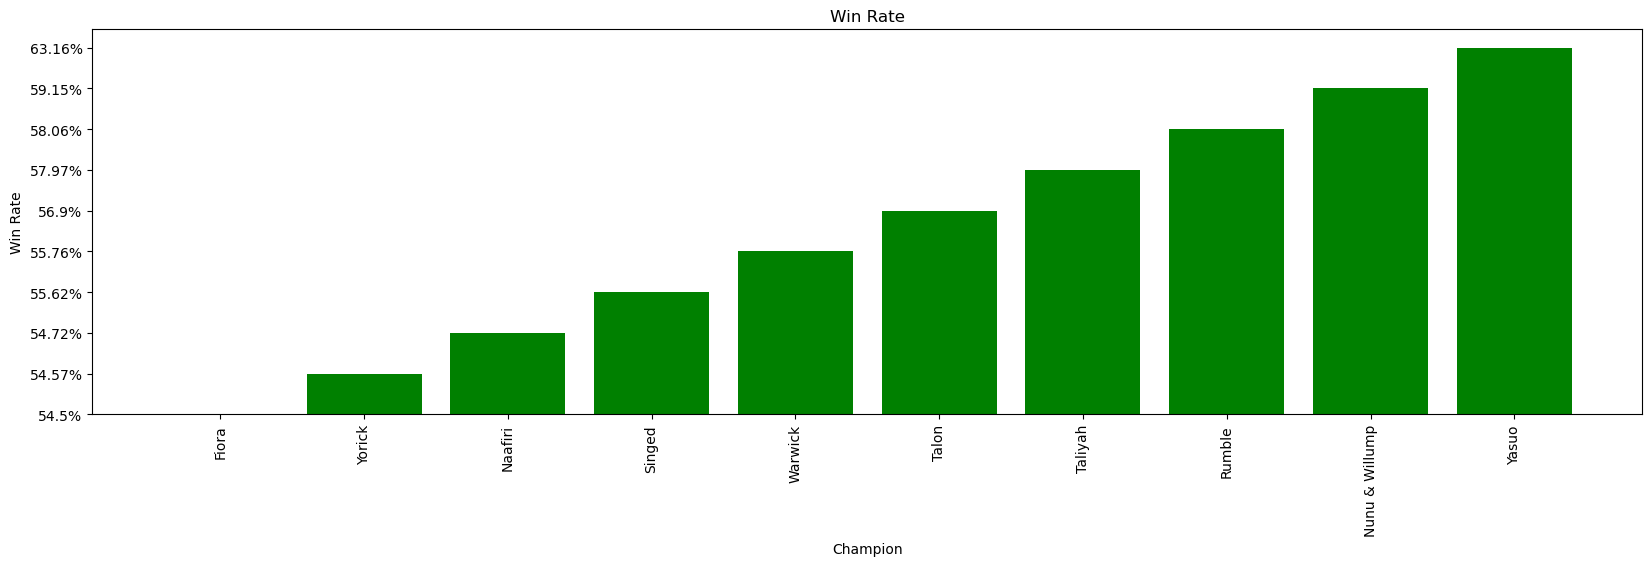

In [268]:
# Create the line plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(highestWinrate.Champion, highestWinrate['Win Rate'], color = 'green')

# Add titles and labels
plt.title('Win Rate')
plt.xlabel('Champion')
plt.xticks(rotation=90)
plt.ylabel('Win Rate')


# Show the plot
plt.show()


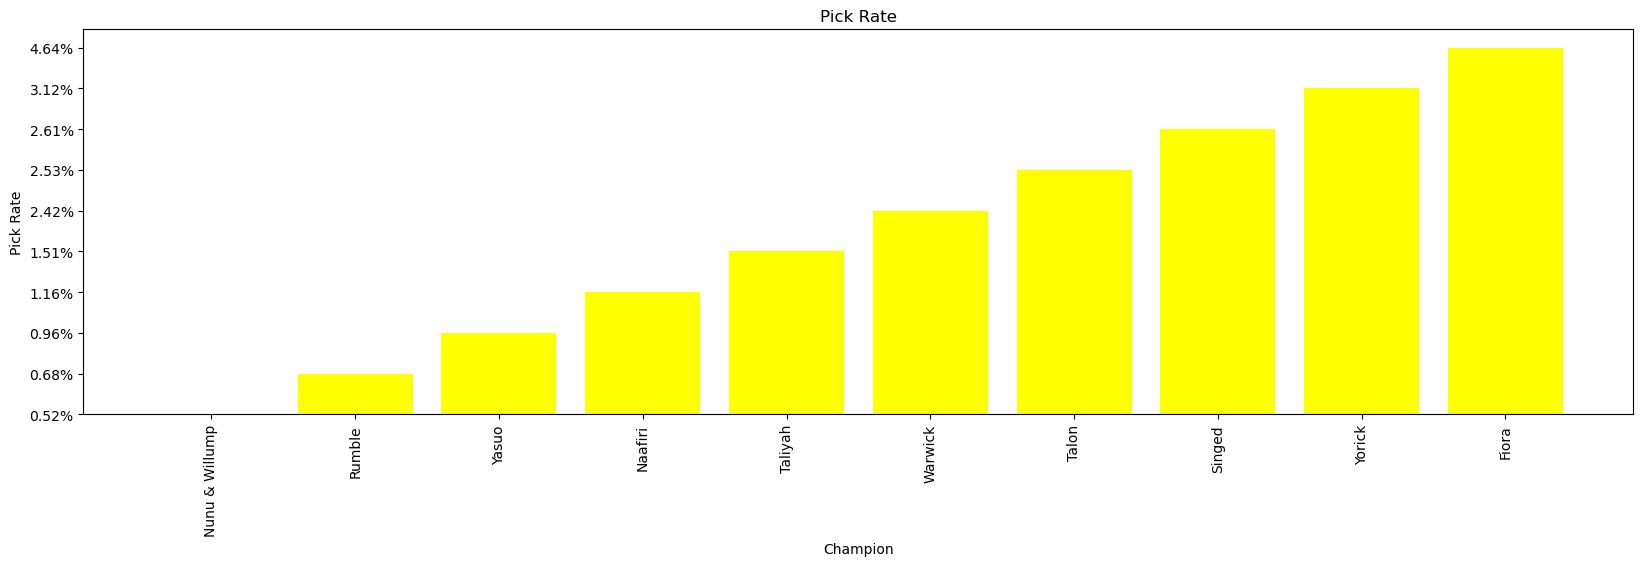

In [267]:

fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(highestPickrate.Champion, highestPickrate['Pick Rate'], color = 'yellow')

# Add titles and labels
plt.title('Pick Rate')
plt.xlabel('Champion')
plt.xticks(rotation=90)
plt.ylabel('Pick Rate')

# Show the plot
plt.show()


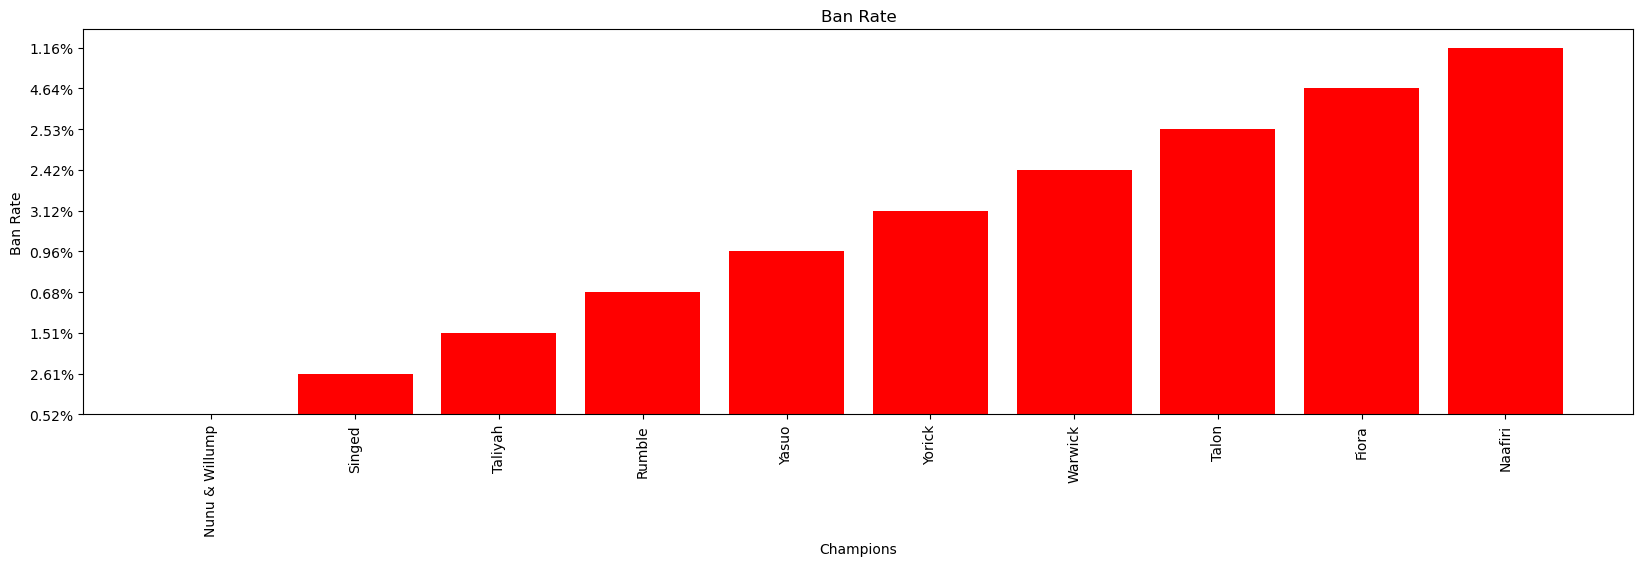

In [266]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(highestBanrate.Champion, highestBanrate['Pick Rate'], color = 'red')

# Add titles and labels
plt.title('Ban Rate')
plt.xlabel('Champions')
plt.xticks(rotation=90)
plt.ylabel('Ban Rate')

# Show the plot
plt.show()

